In [ ]:
from google.colab import files
uploaded=files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print(df.shape)

(1338, 7)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Text(0.5, 1.0, 'sex vs charges')

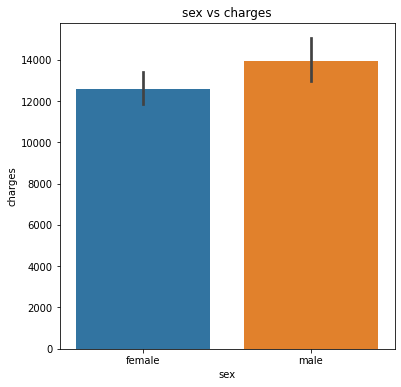

In [ ]:
# males have slightly greater insurance charges than females in general

plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = df)

plt.title('sex vs charges')


Text(0.5, 1.0, 'children vs charges')

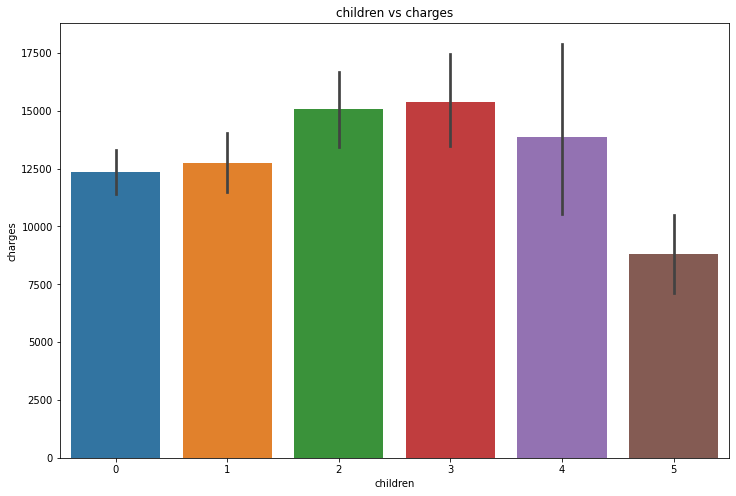

In [ ]:

plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = df)

plt.title('children vs charges')


Text(0.5, 1.0, 'smoker vs charges')

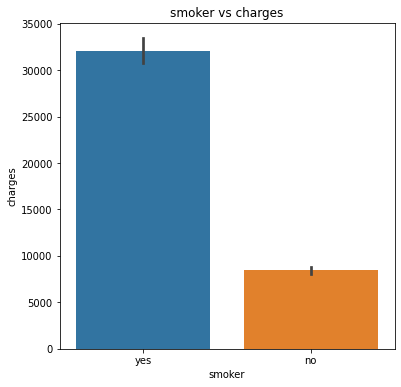

In [ ]:
# from the graph below, it is visible that smokers have more insurance charges than the non smokers

plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = df)

plt.title('smoker vs charges')


In [ ]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [1]:

from sklearn import preprocessing 
df=pd.get_dummies(df,columns=['sex'])
df

NameError: ignored

In [ ]:
df = df.drop('region', axis = 1)

df

KeyError: ignored

In [ ]:
df=pd.get_dummies(df,columns=['smoker'])
df

KeyError: ignored

In [ ]:
df.corr()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.002475,-0.000407,-0.011642,0.010016,0.025019,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.138156,-0.135996,0.270025,-0.006205,-0.003750,0.003750
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.022808,0.024806,-0.023066,0.021914,-0.007673,0.007673
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,0.006349,-0.039905,0.073982,-0.043210,-0.787251,0.787251
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.002425,0.011156,-0.017117,0.004184,0.076185,-0.076185
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.002425,-0.011156,0.017117,-0.004184,-0.076185,0.076185
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,1.000000,-0.320177,-0.345561,-0.320177,-0.002811,0.002811
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,-0.320177,1.000000,-0.346265,-0.320829,0.036945,-0.036945
region_southeast,-0.011642,0.270025,-0.023066,0.073982,-0.017117,0.017117,-0.345561,-0.346265,1.000000,-0.346265,-0.068498,0.068498
region_southwest,0.010016,-0.006205,0.021914,-0.043210,0.004184,-0.004184,-0.320177,-0.320829,-0.346265,1.000000,0.036945,-0.036945


In [ ]:
# splitting the dependent and independent variable

x = df[['age','sex_female','sex_male','bmi','smoker_no','smoker_yes']]
y = df['charges']

print(x.shape)
print(y.shape)


(1338, 6)
(1338,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1070, 6)
(268, 6)
(1070,)
(268,)


In [ ]:

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# creating the model
model = LinearRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)


[34520.84743336  5359.14445971  5386.358559   25521.24317345
 12961.94438096  6397.62455631  4496.70884845  8917.56077754
 32979.27951846 11387.26285833  7538.49430089 10171.13781231
 34909.25909884 11499.08162643  1209.35393969 35812.37172533
 11888.96612929  7950.36599992 28099.67440306 11208.00112702
  1275.04433541  7756.09654303  8088.36602232 11162.32128434
 32650.01099001 38379.84534297 13602.67198201  3346.40144645
 10087.43020288 13852.85917105  1630.12609801 29815.37397351
  1332.3462365  14500.94280013 12721.2419665   7617.06367565
  2233.26630311  6499.57383349   570.61114068  8603.90060777
  4734.30494744 32712.31534016  2402.97128759 14021.89970909
 10159.59588505 30001.9360784   4470.14249941  2939.54073377
  2307.92950876  4544.30152092 10182.84000187 12059.63160812
 12389.40394232  1266.65584078 10474.73705112  6204.65913722
 30804.4120028   3486.17073253 12949.87379286  4014.57575973
 15158.80763009 11079.1979902  10140.60963971  7807.81167977
  -603.44418388  7654.73

In [ ]:
print(y_test)

338    41919.09700
620     3659.34600
965     4746.34400
128    32734.18630
329     9144.56500
          ...     
580    12913.99240
786    12741.16745
321    24671.66334
903     8125.78450
613     6753.03800
Name: charges, Length: 268, dtype: float64


In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.7510233576154528

In [ ]:
from sklearn.metrics import mean_squared_error
m=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(m)
rmse


6197.209235942806

In [ ]:
#svm
from sklearn.svm import SVR

# creating the model
model = SVR()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)


MSE : 174125946.6155738
RMSE : 13195.679088837142
r2 score : -0.12883320908503926


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)


MSE : 21964413.27310821
RMSE : 4686.620666653982
r2 score : 0.8576079004727996


In [ ]:
# creating the model
from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

r2=r2_score(y_test,y_pred)
print(r2)

from sklearn.metrics import mean_squared_error
m=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(m)
rmse


0.7182514783989656


6592.462672692848